<a href="https://colab.research.google.com/github/plaban1981/Timeseries/blob/master/Multivariate__TimeSeries_Forecasting_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multivariate TimeSeries - FBProphet

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from fbprophet import Prophet

#
import matplotlib  as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import os
#
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [3]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [4]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [6]:
df.set_index('timeStamp',inplace=True)

## Energy Consumption of New York from 2012 to 2017 captured every hour

aggrgating hourly data into 1 Day(daily values) using pandas resample ther hourly data

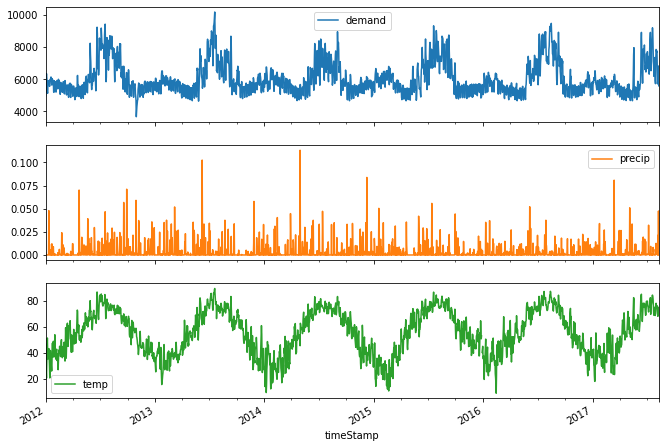

In [13]:
df.resample('D').mean().plot(subplots=True,figsize=(11,8))
plt.show()

* as temperature rises demand for electricity rises
here we will use only demnad to model the timeseries data

In [8]:
df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [9]:
df_daily = df.resample('D').mean()

In [10]:
df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


## fbprophet

y(t) = g(t)(trend) + s(t)(seasonality) + h(t) (holiday)+ epsilon(t)

fbprophet automatically detects the trends by selecting the change points. It internally runs piecewise linear regression model which determines the change points.

Seasonality - periodic functions (weekly,yearly) default additive seasonality

Holiday - give expicits dates to model to find the residuals which is the error component and is always normally distributed

In [21]:
fb_daily = df_daily.reset_index()

In [22]:
fb_daily_final  = fb_daily [['timeStamp','demand','temp']]

# Rename columns in fbprophet format

In [23]:
fb_daily_final = fb_daily_final.rename(columns={'timeStamp':'ds','demand':'y','temp':'temp'})
fb_daily_final

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
2046,2017-08-08,6471.626042,71.039167
2047,2017-08-09,6811.112167,73.852500
2048,2017-08-10,5582.297000,75.217500
2049,2017-08-11,NaN,72.767917


## Check for NULL values 

In [24]:
fb_daily_final .query('temp != temp')

,ds,y,temp
1457,2015-12-28,5510.776333,NaN


In [25]:
fb_daily_final['temp'] = fb_daily_final['temp'].fillna(method='ffill')

In [26]:
fb_daily_final.query('temp != temp')

,ds,y,temp


Prophet takes care of handling null values

In [27]:
fb_daily_final['month'] = fb_daily_final['ds'].dt.month

In [28]:
fb_daily_final.head()

,ds,y,temp,month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1
2,2012-01-03,6095.512500,26.672500,1
3,2012-01-04,6336.266667,20.585000,1
4,2012-01-05,6130.245833,33.577500,1


In [29]:
fig = px.line(fb_daily_final,x='ds',y='y',hover_data=['temp','month'],title='Energy DashBoard')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons=list([
                      dict(count=1,label="1y",step="year",stepmode="backward"),
                      dict(count=1,label="3y",step="year",stepmode="backward"),
                      dict(count=1,label="5y",step="year",stepmode="backward"),
                      dict(step="all")
        ])
    )

)

Visualizing the characteristics of the outliers

In [30]:
fb_daily_final[['month','temp']].groupby('month').agg({'temp':('min','max','mean')})

temp                      
             min        max       mean
month                                 
1       9.507917  55.420455  33.432140
2       9.015000  59.360000  34.517758
3      20.291667  67.878333  41.419884
4      33.045833  72.992083  52.600204
5      48.090833  82.576250  62.543994
6      52.405833  86.916667  71.334418
7      66.417083  89.606667  77.595627
8      68.042083  87.426250  75.525947
9      57.274583  84.448750  69.550306
10     42.106250  74.277500  58.642895
11     27.172500  67.606250  47.225638
12     22.429583  64.735000  41.520068

# Check Corelation between Temperature and Demand

In [31]:
fb_daily_final[['y','temp']].corr()

,y,temp
y,1.000000,0.560888
temp,0.560888,1.000000


In [32]:
fb_daily_final.query('temp > 80')[['y','temp']].corr()

,y,temp
y,1.000000,0.552918
temp,0.552918,1.000000


In [33]:
fb_daily_final.query('temp <= 80')[['y','temp']].corr()

,y,temp
y,1.000000,0.470562
temp,0.470562,1.000000


since temperature above 80 is not modeled properly , we create another column called summer temparature to trap temperature of summer

In [34]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [35]:
fb_daily_final['summer_temp'] = fb_daily_final['temp'].map(summer_temp)

In [36]:
fb_daily_final.head()

,ds,y,temp,month,summer_temp
0,2012-01-01,4954.833333,46.510000,1,0
1,2012-01-02,5302.954167,40.496667,1,0
2,2012-01-03,6095.512500,26.672500,1,0
3,2012-01-04,6336.266667,20.585000,1,0
4,2012-01-05,6130.245833,33.577500,1,0


# Seggregate month into different bins

In [37]:
fb_daily_final['month_bins'] = pd.cut(fb_daily_final['month'],bins=3,labels=False)

In [39]:
fb_daily_final

,ds,y,temp,month,summer_temp,month_bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0
3,2012-01-04,6336.266667,20.585000,1,0,0
4,2012-01-05,6130.245833,33.577500,1,0,0
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



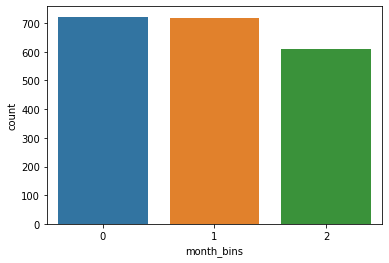

In [40]:
import seaborn as sns
sns.countplot(fb_daily_final['month_bins'])

# Train Test Split

In [42]:
train = fb_daily_final[(fb_daily_final['ds']>='2012-01-01') & (fb_daily_final['ds'] <= '2017-04-30')]
test = fb_daily_final[fb_daily_final['ds'] > '2017-04-30']

In [43]:
train.shape,test.shape

((1947, 6), (104, 6))

create a model for confidence interval of 95% by default Prophet creates with 80%, the data set has yearly seasonality so we have mentioned, we can leave if , by default prophet will pick up seasonality if it exists

In [44]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

# Adding multivariate features

when we have interaction between two features we would have multiplicative term and not additive. Default : additive

In [46]:
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [47]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
m.params

OrderedDict([('k', array([[0.14760422]])),
             ('m', array([[0.58876607]])),
             ('delta',
              array([[-4.71416526e-08, -6.41586311e-06, -1.82744926e-01,
                      -1.67782383e-07, -1.74103167e-08,  1.22142120e-02,
                       7.69355196e-03,  2.98750794e-03,  9.89830150e-08,
                       3.31189176e-08, -3.32094703e-08, -3.81719061e-02,
                      -2.42237664e-05,  7.15586204e-08,  1.40721628e-01,
                       3.60042834e-07, -3.04861026e-07, -9.94059548e-02,
                      -4.33196683e-02,  3.01139014e-08,  6.19431008e-08,
                       5.68495201e-08,  3.76665581e-02,  2.84149406e-02,
                       1.32793754e-07]])),
             ('sigma_obs', array([[0.03884209]])),
             ('beta',
              array([[-0.03548167, -0.05910135,  0.04945314,  0.04015359, -0.00950002,
                      -0.00176236, -0.007792  , -0.00252906,  0.00343317, -0.00585251,
                 

In [49]:
future = m.make_future_dataframe(periods = 104)

In [50]:
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


Add summer_temp and month_bins features as a part of future dataframe

In [51]:
future['summer_temp'] = fb_daily_final['summer_temp']
future['month_bins'] = fb_daily_final['month_bins']

In [52]:
future

,ds,summer_temp,month_bins
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0
...,...,...,...
2046,2017-08-08,0,1
2047,2017-08-09,0,1
2048,2017-08-10,0,1
2049,2017-08-11,0,1


In [53]:
forecast = m.predict(future)

In [54]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,extra_regressors_multiplicative,extra_regressors_multiplicative_lower,extra_regressors_multiplicative_upper,month_bins,month_bins_lower,month_bins_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,summer_temp,summer_temp_lower,summer_temp_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
2046,2017-08-08,6067.113536,6645.027384,8094.148261,6040.208927,6089.924226,1372.097710,1372.097710,1372.097710,0.0,0.0,0.0,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,0.0,0.0,0.0,217.850843,217.850843,217.850843,1154.246867,1154.246867,1154.246867,7383.695055
2047,2017-08-09,6067.184720,6635.270799,8139.673709,6039.767373,6090.681180,1382.872537,1382.872537,1382.872537,0.0,0.0,0.0,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,0.0,0.0,0.0,234.213691,234.213691,234.213691,1148.658846,1148.658846,1148.658846,7394.540415
2048,2017-08-10,6067.255904,6594.431614,8058.093487,6039.325819,6091.075496,1353.139445,1353.139445,1353.139445,0.0,0.0,0.0,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,0.0,0.0,0.0,208.266753,208.266753,208.266753,1144.872692,1144.872692,1144.872692,7364.877855
2049,2017-08-11,6067.327088,6567.596971,8125.044680,6038.867769,6091.626987,1302.863225,1302.863225,1302.863225,0.0,0.0,0.0,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,0.0,0.0,0.0,159.955707,159.955707,159.955707,1142.907517,1142.907517,1142.907517,7314.672167
2050,2017-08-12,6067.398271,6022.704932,7514.130621,6038.161744,6092.194068,721.912577,721.912577,721.912577,0.0,0.0,0.0,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,-0.00915,0.0,0.0,0.0,-420.823695,-420.823695,-420.823695,1142.736272,1142.736272,1142.736272,6733.792052


In [55]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
2046,2017-08-08,6645.027384,8094.148261,7383.695055
2047,2017-08-09,6635.270799,8139.673709,7394.540415
2048,2017-08-10,6594.431614,8058.093487,7364.877855
2049,2017-08-11,6567.596971,8125.044680,7314.672167
2050,2017-08-12,6022.704932,7514.130621,6733.792052


yhat_lower and yhat_upper ==> specifies 95% confidence interval of the predictions

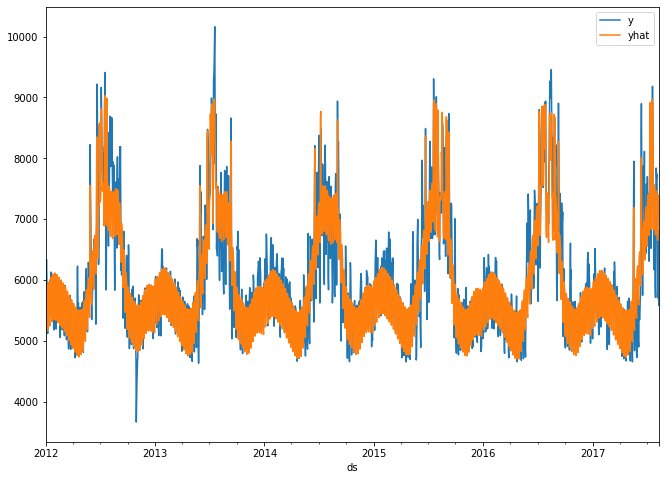

In [58]:
pd.concat([fb_daily_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot(figsize=(11,8))

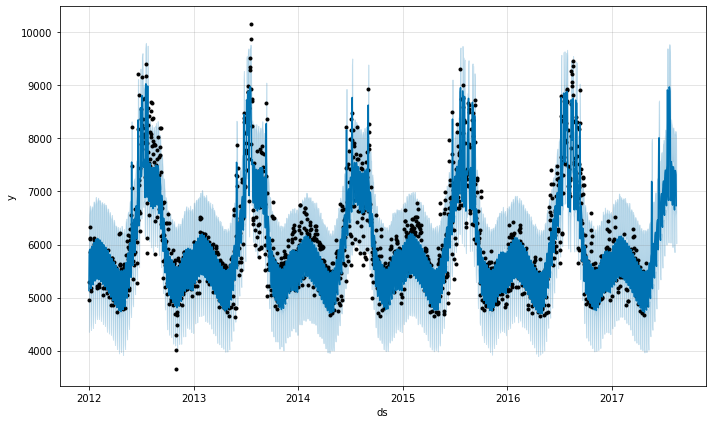

In [59]:
fig1 = m.plot(forecast)

modeleded better , lot of anomolies have been covered because of the features incorporated

scatter points actuals values , dark blue filled lines forecasted value (yhat)

Light blue lines(yhat_lower and yhat_upper)

only 2013 has outliers with respect to other years. whereever outliers were present the model did not generalize well.

Plot Components


no weekly seasonality, monday to  friday  demand remains somewhat constant and less in weekends.


demand increases between  May and September

trend works on a piecewise linear regression 

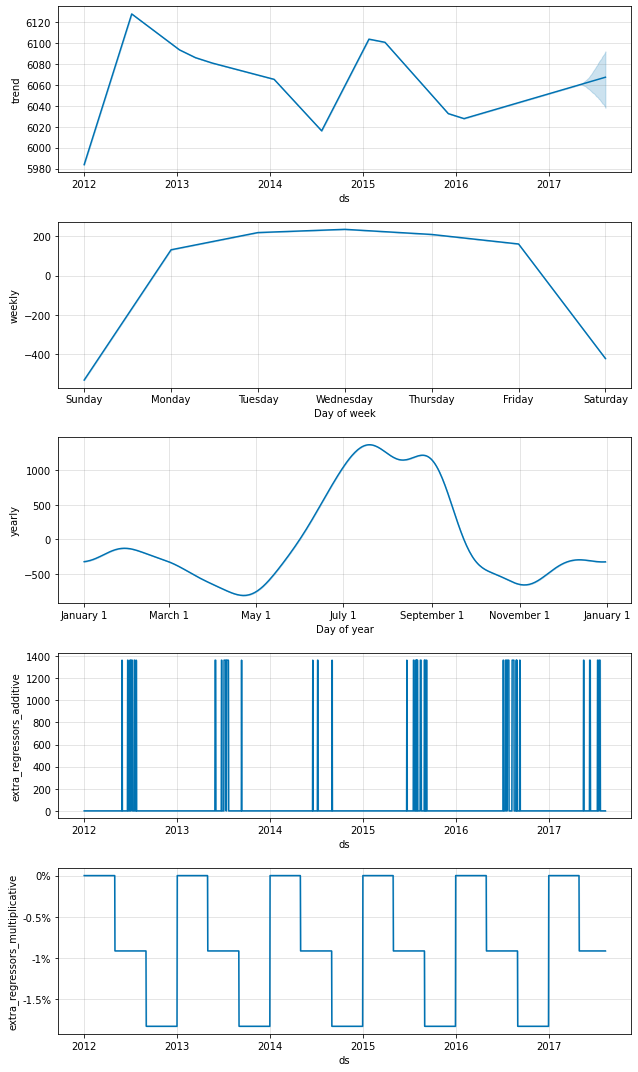

In [60]:
fig2 = m.plot_components(forecast)

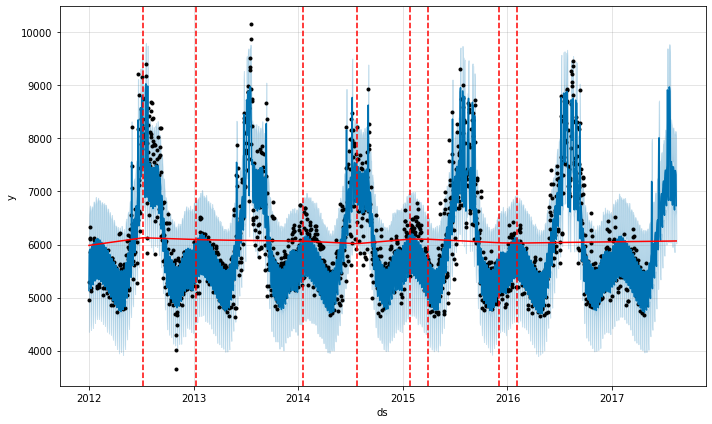

In [61]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a =add_changepoints_to_plot(fig.gca(),m,forecast)

by default prophet creates change points on 80% of the data

# Dates when the change in pattern occurred

In [62]:
m.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

In [63]:
deltas = m.params['delta'].mean()
deltas

-0.0053589768288552705

We can increase the number of change points to be plotted as follows 

In [64]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [65]:
fig = plot_plotly(m,forecast)
py.iplot(fig)

# Cross Validation

take initial 731 days for cross validation and forecast period upto 365 days ( 365 * 2 =730)

for every 180 ( days it is going to do an internal cutoff of cross validation

180 * 4 = 730 days  + 1 day extra hence 5 cutoff ranges for cross validation

In [66]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model=m,initial='731days',horizon='365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


Performance metrics

In [ ]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5560.399158,4752.753268,6394.958579,5460.325000,2014-05-01
1,2014-05-03,4970.368653,4127.336930,5791.895780,4893.683333,2014-05-01
2,2014-05-04,4846.526492,3968.913094,5622.986702,4764.137500,2014-05-01
3,2014-05-05,5527.405000,4573.911382,6358.774583,5406.762500,2014-05-01
4,2014-05-06,5622.303858,4836.956327,6517.683125,5409.750000,2014-05-01


# Evaluation of the Model on the cross vcalidation results

In [67]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(cv_results)

In [68]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,204293.922864,451.988853,352.610429,0.062543,0.051056,0.890110
1,37 days 00:00:00,210424.439085,458.720437,359.614485,0.063723,0.051274,0.879121
2,37 days 12:00:00,211653.376540,460.058014,361.875027,0.064102,0.051798,0.879121
3,38 days 00:00:00,215758.752010,464.498388,365.841034,0.064497,0.053251,0.873626
4,38 days 12:00:00,217944.760867,466.845543,369.633793,0.065097,0.054411,0.873626
...,...,...,...,...,...,...,...
653,363 days 00:00:00,156476.433386,395.571022,334.336980,0.061215,0.060978,0.978022
654,363 days 12:00:00,156952.382181,396.172162,334.121377,0.061178,0.060978,0.978022
655,364 days 00:00:00,160084.466586,400.105569,336.855265,0.061888,0.061735,0.972527
656,364 days 12:00:00,159558.111682,399.447258,335.652320,0.061691,0.061467,0.972527


## mape is aroung 0.06  compared to univariate timeseries where it was 0.06 to 0.08

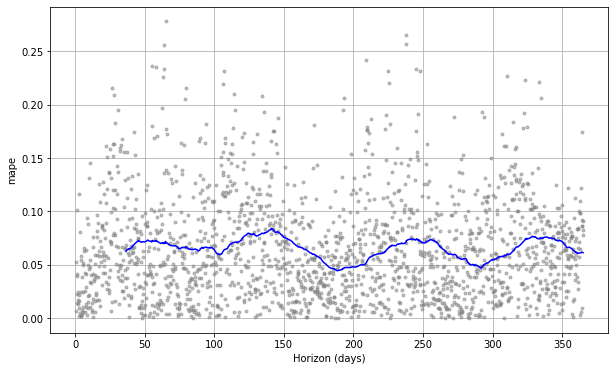

In [70]:
from fbprophet.plot import plot_cross_validation_metric
fig3= plot_cross_validation_metric(cv_results,metric='mape')

#### Blue line is the mean of the metrics

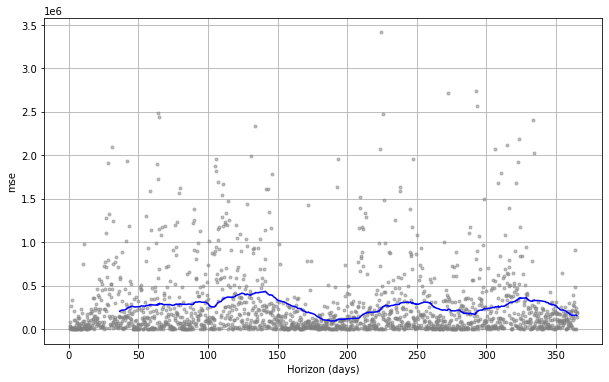

In [71]:
fig3= plot_cross_validation_metric(cv_results,metric='mse')

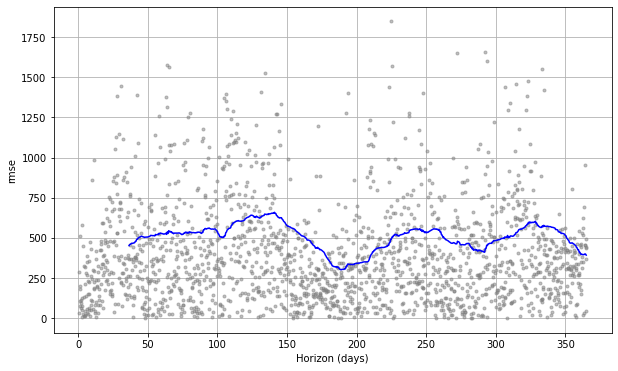

In [72]:
fig3= plot_cross_validation_metric(cv_results,metric='rmse')